In [5]:
import pandas as pd
import numpy as np
from datetime import date, datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
df_train = pd.read_csv('input\/dengue_features_train.csv', parse_dates=True)
df_test = pd.read_csv('input\/dengue_features_test.csv', parse_dates=True)
df = df_train.append(df_test)

In [27]:
df = df.drop(['year', 'weekofyear'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 415
Data columns (total 22 columns):
city                                     1872 non-null object
week_start_date                          1872 non-null object
ndvi_ne                                  1635 non-null float64
ndvi_nw                                  1809 non-null float64
ndvi_se                                  1849 non-null float64
ndvi_sw                                  1849 non-null float64
precipitation_amt_mm                     1857 non-null float64
reanalysis_air_temp_k                    1860 non-null float64
reanalysis_avg_temp_k                    1860 non-null float64
reanalysis_dew_point_temp_k              1860 non-null float64
reanalysis_max_air_temp_k                1860 non-null float64
reanalysis_min_air_temp_k                1860 non-null float64
reanalysis_precip_amt_kg_per_m2          1860 non-null float64
reanalysis_relative_humidity_percent     1860 non-null float64
reanalysis_sat

In [28]:
df.describe()

ndvi_ne      ndvi_nw      ndvi_se      ndvi_sw  \
count  1635.000000  1809.000000  1849.000000  1849.000000   
mean      0.138588     0.129713     0.204663     0.202174   
std       0.146413     0.125082     0.075064     0.085768   
min      -0.463400    -0.456100    -0.015533    -0.063457   
25%       0.035300     0.041225     0.153457     0.141014   
50%       0.127317     0.115200     0.197029     0.188229   
75%       0.252225     0.223360     0.250857     0.248086   
max       0.508357     0.649000     0.538314     0.546017   

       precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
count           1857.000000            1860.000000            1860.000000   
mean              44.109278             298.727770             299.253955   
std               42.065868               1.387410               1.272510   
min                0.000000             294.554286             294.892857   
25%                9.430000             297.678929             298.276786   
50%               36.640000             298.617143             299.300000   
75%               67.500000             299.891429             300.271429   
max              390.600000             302.200000             303.328571   

       reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
count                  1860.000000                1860.000000   
mean                    295.284823                 303.470806   
std                       1.528046                   3.205739   
min                     289.642857                 297.800000   
25%                     294.164643                 301.000000   
50%                     295.667143                 302.600000   
75%                     296.502857                 305.500000   
max                     298.450000                 314.100000   

       reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
count                1860.000000                       1860.00000   
mean                  295.724570                         40.60128   
std                     2.609461                         44.70528   
min                   286.200000                          0.00000   
25%                   293.800000                         12.49250   
50%                   296.200000                         27.08000   
75%                   298.000000                         53.12500   
max                   299.900000                        570.50000   

       reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
count                           1860.000000                   1857.000000   
mean                              82.237158                     44.109278   
std                                7.203803                     42.065868   
min                               57.787143                      0.000000   
25%                               77.214643                      9.430000   
50%                               80.307143                     36.640000   
75%                               86.799286                     67.500000   
max                               98.610000                    390.600000   

       reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
count                            1860.000000        1860.000000   
mean                               16.786638           4.952903   
std                                 1.547336           3.545887   
min                                11.715714           1.357143   
25%                                15.590714           2.357143   
50%                                17.137143           2.871429   
75%                                18.028929           7.757143   
max                                20.461429          16.028571   

       station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
count         1817.000000              1817.000000         1849.000000   
mean            27.226651                 8.004112           32.470795   
std              1.281254              

In [29]:
df = df.set_index('week_start_date')

In [30]:
df.loc[(df.city == 'sj')]

city   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
week_start_date                                                
1990-04-30        sj  0.122600  0.103725  0.198483  0.177617   
1990-05-07        sj  0.169900  0.142175  0.162357  0.155486   
1990-05-14        sj  0.032250  0.172967  0.157200  0.170843   
1990-05-21        sj  0.128633  0.245067  0.227557  0.235886   
1990-05-28        sj  0.196200  0.262200  0.251200  0.247340   
1990-06-04        sj       NaN  0.174850  0.254314  0.181743   
1990-06-11        sj  0.112900  0.092800  0.205071  0.210271   
1990-06-18        sj  0.072500  0.072500  0.151471  0.133029   
1990-06-25        sj  0.102450  0.146175  0.125571  0.123600   
1990-07-02        sj       NaN  0.121550  0.160683  0.202567   
1990-07-09        sj  0.192875  0.082350  0.191943  0.152929   
1990-07-16        sj  0.291600  0.211800  0.301200  0.280667   
1990-07-23        sj  0.150567  0.171700  0.226900  0.214557   
1990-07-30        sj       NaN  0.247150  0.379700  0.381357   
1990-08-06        sj       NaN  0.064333  0.164443  0.138857   
1990-08-13        sj       NaN  0.128033  0.206957  0.168243   
1990-08-20        sj  0.190233  0.168800  0.167657  0.172286   
1990-08-27        sj  0.252900  0.330750  0.264171  0.284314   
1990-09-03        sj  0.235400  0.200025  0.283817  0.230443   
1990-09-10        sj  0.127967  0.437100  0.123400  0.148283   
1990-09-17        sj  0.196350  0.182433  0.254829  0.305686   
1990-09-24        sj  0.116100  0.260900  0.199443  0.244217   
1990-10-01        sj  0.228550  0.189750  0.212486  0.201186   
1990-10-08        sj  0.171150  0.067550  0.179467  0.157717   
1990-10-15        sj       NaN  0.070200  0.181617  0.165750   
1990-10-22        sj  0.146200  0.089750  0.128829  0.123929   
1990-10-29        sj  0.252250  0.183433  0.318000  0.295900   
1990-11-05        sj  0.152600  0.181775  0.178329  0.186629   
1990-11-12        sj  0.290800  0.224600  0.180386  0.234886   
1990-11-19        sj  0.272200  0.330350  0.131633  0.125383   
1990-11-26        sj  0.136767  0.216525  0.176786  0.141586   
1990-12-03        sj  0.109800  0.088600  0.266783  0.251700   
1990-12-10        sj  0.121350  0.261660  0.191386  0.209986   
1990-12-17        sj  0.293133  0.266867  0.260857  0.302729   
1990-12-24        sj  0.302500  0.277233  0.171267  0.161622   
1991-01-01        sj  0.146500  0.140467  0.151500  0.167314   
1991-01-08        sj       NaN  0.100467  0.251900  0.137617   
1991-01-15        sj       NaN  0.293567  0.259943  0.217900   
1991-01-22        sj  0.331300  0.309333  0.221029  0.202757   
1991-01-29        sj  0.091700  0.246425  0.243857  0.195600   
1991-02-05        sj  0.380100  0.228567  0.255043  0.225800   
1991-02-12        sj  0.071200  0.221100  0.276243  0.267343   
1991-02-19        sj       NaN  0.209400  0.108433  0.119400   
1991-02-26        sj  0.170200  0.208600  0.137520  0.191433   
1991-03-05        sj  0.210750  0.264100  0.247686  0.216357   
1991-03-12        sj       NaN       NaN  0.213250  0.240543   
1991-03-19        sj  0.127900  0.178400  0.147014  0.159300   
1991-03-26        sj  0.280350  0.223575  0.247883  0.247386   
1991-04-02        sj  0.169100  0.216825  0.260514  0.221971   
1991-04-09        sj  0.176500  0.276300  0.184533  0.177367   
1991-04-16        sj  0.077400  0.102400  0.163550  0.206167   
1991-04-23        sj       NaN  0.188450  0.188314  0.224943   
1991-04-30        sj  0.209167  0.160575  0.176171  0.176171   
1991-05-07        sj  0.115950  0.180175  0.106386  0.111186   
1991-05-14        sj       NaN  0.104550  0.151150  0.096400   
1991-05-21        sj  0.066900  0.133567  0.097117  0.135600   
1991-05-28        sj  0.140100  0.159467  0.214317  0.257100   
1991-06-04        sj  0.085850  0.087000  0.119600  0.165929   
1991-06-11        sj  0.109100  0.156467  0.173429  0.173971   
1991-06-18        sj  0.059600  0.092350  0.130129  0.130643   
1991-06-25        sj  0.079650  0.122000  0.1851

In [31]:
df.loc[(df.city == 'iq')]

city   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
week_start_date                                                
2000-07-01        iq  0.192886  0.132257  0.340886  0.247200   
2000-07-08        iq  0.216833  0.276100  0.289457  0.241657   
2000-07-15        iq  0.176757  0.173129  0.204114  0.128014   
2000-07-22        iq  0.227729  0.145429  0.254200  0.200314   
2000-07-29        iq  0.328643  0.322129  0.254371  0.361043   
2000-08-05        iq  0.205529  0.190757  0.231671  0.255314   
2000-08-12        iq  0.312486  0.329986  0.380586  0.387271   
2000-08-19        iq  0.384133  0.392240  0.341780  0.382750   
2000-08-26        iq  0.408157  0.322157  0.406714  0.302714   
2000-09-02        iq  0.332043  0.321057  0.314614  0.324257   
2000-09-09        iq  0.295586  0.295683  0.312214  0.265929   
2000-09-16        iq  0.284657  0.309757  0.387883  0.328157   
2000-09-23        iq  0.348814  0.295717  0.404843  0.242571   
2000-09-30        iq  0.175686  0.099483  0.225714  0.182786   
2000-10-07        iq  0.337540  0.276943  0.277500  0.255050   
2000-10-14        iq  0.223533  0.133914  0.349800  0.100917   
2000-10-21        iq  0.274800  0.187057  0.373943  0.279471   
2000-10-28        iq  0.367300  0.305550  0.455380  0.325800   
2000-11-04        iq  0.295100  0.211520  0.304400  0.279617   
2000-11-11        iq  0.271367  0.151567  0.347250  0.231867   
2000-11-18        iq  0.099933  0.035860  0.195486  0.064183   
2000-11-25        iq  0.169983  0.289300  0.300983  0.170917   
2000-12-02        iq  0.251971  0.253800  0.323514  0.319100   
2000-12-09        iq  0.165833  0.182414  0.254567  0.186250   
2000-12-16        iq  0.338786  0.316829  0.350343  0.297700   
2000-12-23        iq  0.265014  0.169057  0.234867  0.302243   
2001-01-01        iq  0.254714  0.228529  0.250586  0.287000   
2001-01-08        iq  0.302133  0.203517  0.267433  0.274000   
2001-01-15        iq  0.174757  0.103317  0.258243  0.176729   
2001-01-22        iq  0.237600  0.191267  0.125857  0.231443   
2001-01-29        iq  0.341500  0.260667  0.329386  0.369071   
2001-02-05        iq  0.233586  0.161000  0.196614  0.226700   
2001-02-12        iq  0.155414  0.135017  0.148529  0.157100   
2001-02-19        iq  0.135371  0.082300  0.129757  0.184043   
2001-02-26        iq  0.307640  0.228217  0.224500  0.291283   
2001-03-05        iq  0.182043  0.289000  0.206871  0.206329   
2001-03-12        iq  0.205383  0.176900  0.206357  0.204129   
2001-03-19        iq  0.188343  0.195033  0.163543  0.284143   
2001-03-26        iq  0.162380  0.150817  0.094657  0.132257   
2001-04-02        iq  0.267814  0.312643  0.261500  0.258400   
2001-04-09        iq  0.382757  0.370971  0.343886  0.376271   
2001-04-16        iq  0.312543  0.282214  0.262129  0.407486   
2001-04-23        iq  0.245614  0.214843  0.273371  0.228800   
2001-04-30        iq  0.254014  0.179000  0.312829  0.262557   
2001-05-07        iq  0.266457  0.188600  0.196200  0.227329   
2001-05-14        iq  0.315343  0.319650  0.262700  0.303486   
2001-05-21        iq  0.298586  0.379667  0.184243  0.268529   
2001-05-28        iq  0.299943  0.302943  0.318714  0.387443   
2001-06-04        iq  0.363567  0.181914  0.253971  0.246729   
2001-06-11        iq  0.317083  0.298967  0.219871  0.217343   
2001-06-18        iq  0.104100  0.108243  0.059657  0.113757   
2001-06-25        iq  0.192300  0.275286  0.316457  0.325414   
2001-07-02        iq  0.229083  0.193267  0.270457  0.242186   
2001-07-09        iq  0.359717  0.311057  0.264986  0.438843   
2001-07-16        iq  0.319500  0.205086  0.194743  0.361633   
2001-07-23        iq  0.291157  0.252633  0.218200  0.325986   
2001-07-30        iq  0.237117  0.195617  0.188314  0.133900   
2001-08-06        iq  0.200757  0.237729  0.223643  0.204357   
2001-08-13        iq  0.282171  0.273557  0.265857  0.366457   
2001-08-20        iq  0.240757  0.193114  0.206343  0.246914   
2001-08-27        iq  0.228071  0.199986  0.2331

In [32]:
df.groupby('city').count()

ndvi_ne  ndvi_nw  ndvi_se  ndvi_sw  precipitation_amt_mm  \
city                                                             
iq        673      673      673      673                   672   
sj        962     1136     1176     1176                  1185   

      reanalysis_air_temp_k  reanalysis_avg_temp_k  \
city                                                 
iq                      672                    672   
sj                     1188                   1188   

      reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
city                                                           
iq                            672                        672   
sj                           1188                       1188   

      reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
city                                                               
iq                          672                              672   
sj                         1188                             1188   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
city                                                                       
iq                                     672                           672   
sj                                    1188                          1185   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
city                                                             
iq                                      672                672   
sj                                     1188               1188   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
city                                                                    
iq                   629                      629                 661   
sj                  1188                     1188                1188   

      station_min_temp_c  station_precip_mm  
city                                         
iq                   661                657  
sj                  1188               1188

In [33]:
final_df = pd.DataFrame(index = df.index.unique())
for val in df.city.unique():
    df_by_city = df.loc[(df.city == val)]
    df_by_city.drop_duplicates(inplace=True)
    df_by_city = df_by_city.drop(['city'], axis=1)
    df_by_city = df_by_city.add_prefix(str(val)+'_')
    final_df = pd.concat([final_df, df_by_city], axis=1, join='outer', sort=True) 

C:\Users\silva\Anaconda3\envs\mestrado\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [34]:
final_df = final_df.loc[:'2010-06-25']

In [35]:
final_df

sj_ndvi_ne  sj_ndvi_nw  sj_ndvi_se  sj_ndvi_sw  \
1990-04-30    0.122600    0.103725    0.198483    0.177617   
1990-05-07    0.169900    0.142175    0.162357    0.155486   
1990-05-14    0.032250    0.172967    0.157200    0.170843   
1990-05-21    0.128633    0.245067    0.227557    0.235886   
1990-05-28    0.196200    0.262200    0.251200    0.247340   
1990-06-04         NaN    0.174850    0.254314    0.181743   
1990-06-11    0.112900    0.092800    0.205071    0.210271   
1990-06-18    0.072500    0.072500    0.151471    0.133029   
1990-06-25    0.102450    0.146175    0.125571    0.123600   
1990-07-02         NaN    0.121550    0.160683    0.202567   
1990-07-09    0.192875    0.082350    0.191943    0.152929   
1990-07-16    0.291600    0.211800    0.301200    0.280667   
1990-07-23    0.150567    0.171700    0.226900    0.214557   
1990-07-30         NaN    0.247150    0.379700    0.381357   
1990-08-06         NaN    0.064333    0.164443    0.138857   
1990-08-13         NaN    0.128033    0.206957    0.168243   
1990-08-20    0.190233    0.168800    0.167657    0.172286   
1990-08-27    0.252900    0.330750    0.264171    0.284314   
1990-09-03    0.235400    0.200025    0.283817    0.230443   
1990-09-10    0.127967    0.437100    0.123400    0.148283   
1990-09-17    0.196350    0.182433    0.254829    0.305686   
1990-09-24    0.116100    0.260900    0.199443    0.244217   
1990-10-01    0.228550    0.189750    0.212486    0.201186   
1990-10-08    0.171150    0.067550    0.179467    0.157717   
1990-10-15         NaN    0.070200    0.181617    0.165750   
1990-10-22    0.146200    0.089750    0.128829    0.123929   
1990-10-29    0.252250    0.183433    0.318000    0.295900   
1990-11-05    0.152600    0.181775    0.178329    0.186629   
1990-11-12    0.290800    0.224600    0.180386    0.234886   
1990-11-19    0.272200    0.330350    0.131633    0.125383   
1990-11-26    0.136767    0.216525    0.176786    0.141586   
1990-12-03    0.109800    0.088600    0.266783    0.251700   
1990-12-10    0.121350    0.261660    0.191386    0.209986   
1990-12-17    0.293133    0.266867    0.260857    0.302729   
1990-12-24    0.302500    0.277233    0.171267    0.161622   
1991-01-01    0.146500    0.140467    0.151500    0.167314   
1991-01-08         NaN    0.100467    0.251900    0.137617   
1991-01-15         NaN    0.293567    0.259943    0.217900   
1991-01-22    0.331300    0.309333    0.221029    0.202757   
1991-01-29    0.091700    0.246425    0.243857    0.195600   
1991-02-05    0.380100    0.228567    0.255043    0.225800   
1991-02-12    0.071200    0.221100    0.276243    0.267343   
1991-02-19         NaN    0.209400    0.108433    0.119400   
1991-02-26    0.170200    0.208600    0.137520    0.191433   
1991-03-05    0.210750    0.264100    0.247686    0.216357   
1991-03-12         NaN         NaN    0.213250    0.240543   
1991-03-19    0.127900    0.178400    0.147014    0.159300   
1991-03-26    0.280350    0.223575    0.247883    0.247386   
1991-04-02    0.169100    0.216825    0.260514    0.221971   
1991-04-09    0.176500    0.276300    0.184533    0.177367   
1991-04-16    0.077400    0.102400    0.163550    0.206167   
1991-04-23         NaN    0.188450    0.188314    0.224943   
1991-04-30    0.209167    0.160575    0.176171    0.176171   
1991-05-07    0.115950    0.180175    0.106386    0.111186   
1991-05-14         NaN    0.104550    0.151150    0.096400   
1991-05-21    0.066900    0.133567    0.097117    0.135600   
1991-05-28    0.140100    0.159467    0.214317    0.257100   
1991-06-04    0.085850    0.087000    0.119600    0.165929   
1991-06-11    0.109100    0.156467    0.173429    0.173971   
1991-06-18    0.059600    0.092350    0.130129    0.130643   
1991-06-25    0.079650    0.122000    0.185114    0.158243   
1991-07-02         NaN    0.177933    0.201529    0.198157   
1991-07-09    0.096900         NaN    0.138050    0.167917   
1991-07-16         NaN    0.077333    0.0998

In [36]:
final_df.to_csv(r'output\/CompleteDengue.csv', index = True)

In [6]:
y = pd.read_csv('input/\dengue_labels_train.csv', parse_dates=True)

y.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [7]:
y = y.groupby(['year', 'weekofyear']).sum()
y.head()

total_cases
year weekofyear             
1990 18                    4
     19                    5
     20                    4
     21                    3
     22                    6

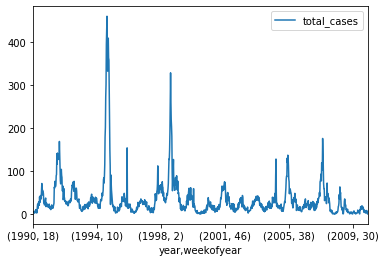

In [8]:
y.plot()